In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ..

/Share/home/shibinbin/projects/emaize


In [3]:
import pandas as pd

/dev/shm/shibinbin/anaconda2/lib/python2.7/site-packages/numexpr/cpuinfo.py:42: UserWarning: [Errno 2] No such file or directory
  warnings.warn(str(e), UserWarning, stacklevel=stacklevel)


In [4]:
results = pd.read_hdf('output/fastlmm/result.trait1')

In [5]:
results.head()

,sid_index,SNP,Chr,GenDist,ChrPos,PValue,SnpWeight,SnpWeightSE,SnpFractVarExpl,Mixing,Nullh2
0,8212,15194965,8.0,0.0,15194965.0,7.960012e-25,0.654069,0.063104,0.170044,0.0,0.868401
1,5307,75530826,6.0,0.0,75530826.0,2.283095e-24,0.642006,0.062569,0.168383,0.0,0.868172
2,1521,8364656,10.0,0.0,8364656.0,5.379994e-24,0.639408,0.062840,0.167019,0.0,0.868867
3,4418,156687245,1.0,0.0,156687245.0,2.760619e-23,0.625287,0.062465,0.164384,0.0,0.866765
4,4003,24107290,3.0,0.0,24107290.0,1.334810e-22,0.628513,0.063817,0.161803,0.0,0.868496


In [9]:
results.tail()

,sid_index,SNP,Chr,GenDist,ChrPos,PValue,SnpWeight,SnpWeightSE,SnpFractVarExpl,Mixing,Nullh2
99996,6168,174418358,4.0,0.0,174418358.0,0.999984,1.019550e-06,0.050940,3.332093e-07,0.0,0.870638
99997,4683,137398567,10.0,0.0,137398567.0,0.999985,-6.513108e-07,0.035761,3.032146e-07,0.0,0.868867
99998,14920,219416188,1.0,0.0,219416188.0,0.999988,9.268014e-07,0.060890,2.533986e-07,0.0,0.866765
99999,15151,15619462,1.0,0.0,15619462.0,0.999988,-7.161018e-07,0.048470,2.459626e-07,0.0,0.866765
100000,6302,95120149,9.0,0.0,95120149.0,0.999993,4.232935e-07,0.049657,1.419141e-07,0.0,0.868007


In [16]:
ind_sig = results['sid_index'][results['PValue'] < 1e-5].values
ind_sig.shape

(1845,)

In [8]:
results.shape

(100001, 11)

In [11]:
import h5py
with h5py.File('output/random_select/100000', 'r') as f:
    X = f['/0/X'][:]

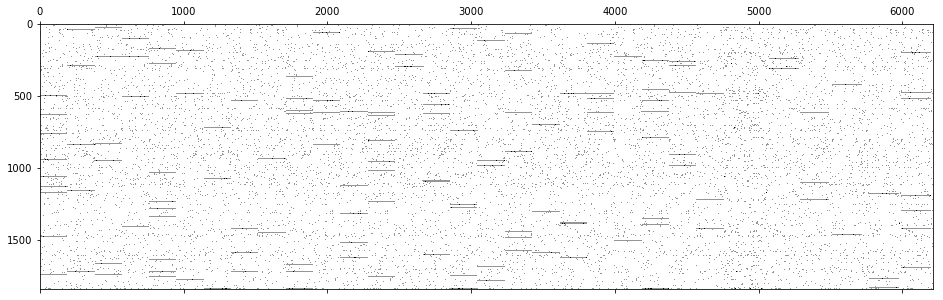

In [18]:
fig, ax = plt.subplots(figsize=(16, 16))
ax.matshow(X[ind_sig, :], cmap=cm.Greys)

In [19]:
X_sig = X[ind_sig, :]

In [22]:
X_sig_normed = (X_sig.astype('float32') - X_sig.mean(axis=1)[:, np.newaxis])/X_sig.std(axis=1)[:, np.newaxis]

In [59]:
XTX = np.dot(X_sig_normed, X_sig_normed.T)
S, U = np.linalg.eigh(XTX)

In [56]:
A = np.dot(np.linalg.inv(XTX), X_sig_normed)

In [57]:
beta = np.dot(A, np.random.normal(size=A.shape[1]))
beta

array([ 0.01710858,  0.00894865, -0.02074421, ..., -0.02388792,
       -0.00073308, -0.00163615])

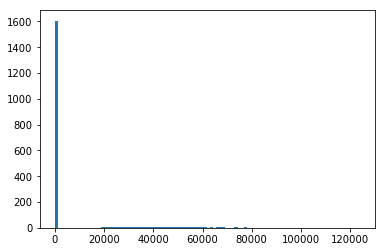

In [36]:
h = hist(S, bins=100)

In [37]:
1.0/S

array([  1.00000000e+00,   1.00000000e+00,   1.00000000e+00, ...,
         9.66507279e-06,   8.57096485e-06,   8.08514516e-06])

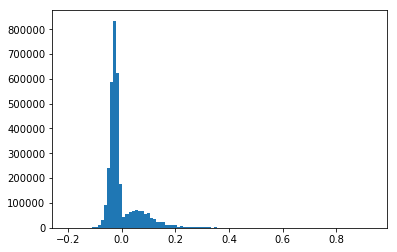

In [67]:
pcc = np.ravel(XTX/X_sig_normed.shape[1])
pcc = pcc[pcc < 0.99]
h = hist(pcc, bins=100)

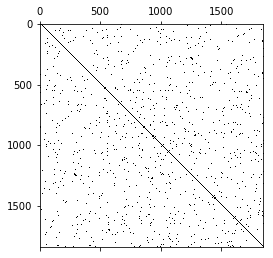

In [75]:
matshow(np.abs(XTX/X_sig_normed.shape[1]) > 0.2, cmap=cm.Greys)

In [82]:
np.sum(S > 0.1)

568

In [80]:
S

array([ -2.99216518e-10,  -2.05748874e-10,  -1.84075128e-10, ...,
         1.03464336e+05,   1.16671979e+05,   1.23682617e+05])

In [88]:
np.sum(np.sort(np.abs(pcc)) > 0.5)

4802

In [89]:
import GPy

ImportError: No module named GPy

In [181]:
X_cor = np.repeat(np.random.normal(size=(100, 5)), 5, axis=1)
w_cor = np.random.normal(size=25)
y_cor = np.dot(X_cor, w_cor) + np.random.normal(scale=0.1, size=X_cor.shape[0])
X_cor_test = np.repeat(np.random.normal(size=(100, 5)), 5, axis=1)
y_cor_test = np.dot(X_cor_test, w_cor) + np.random.normal(scale=0.1, size=X_cor_test.shape[0])

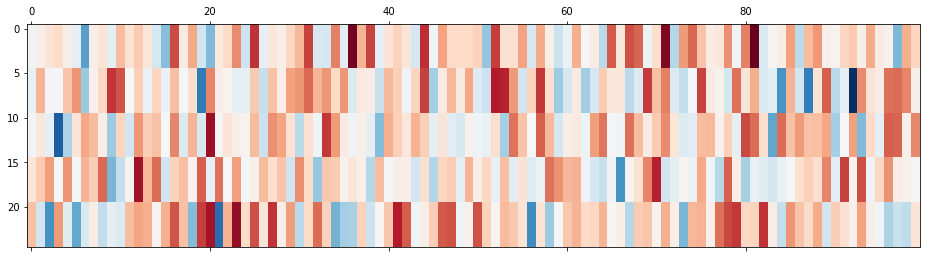

In [182]:
matshow(X_cor.T, cmap=cm.RdBu_r)

In [126]:
from sklearn.linear_model import Ridge
lin = Ridge(0)
lin.fit(X_cor, y_cor)
ridge = Ridge(0.001)
ridge.fit(X_cor, y_cor)

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [111]:
lin.coef_

array([  1.31950557e+13,   1.16003726e+13,  -2.36322042e+13,
        -1.40046478e+12,   2.37240608e+11,  -5.90732249e+13,
         1.47683062e+13,   1.47683062e+13,   1.47683062e+13,
         1.47683062e+13,   1.36643958e+13,  -3.41609894e+12,
        -3.41609894e+12,  -3.41609894e+12,  -3.41609894e+12,
         6.96554513e+10,  -1.74138628e+10,  -1.74138628e+10,
        -1.74138628e+10,  -1.74138628e+10,   4.17766597e+12,
        -1.04441649e+12,  -1.04441649e+12,  -1.04441649e+12,
        -1.04441649e+12])

In [127]:
ridge.coef_

array([ 0.69688551,  0.69688551,  0.69688551,  0.69688551,  0.69688551,
        0.75253035,  0.75253035,  0.75253035,  0.75253035,  0.75253035,
        0.06768312,  0.06768312,  0.06768312,  0.06768312,  0.06768312,
       -0.13103996, -0.13103996, -0.13103996, -0.13103996, -0.13103996,
        0.6535973 ,  0.6535973 ,  0.6535973 ,  0.6535973 ,  0.6535973 ])

In [123]:
w_cor.reshape((5, 5)).mean(axis=1)

array([ 0.69848542,  0.75107237,  0.06652162, -0.13037862,  0.65526368])

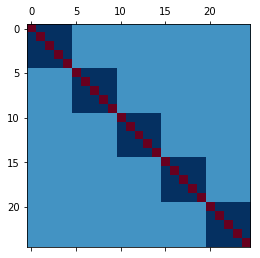

In [138]:
matshow(np.linalg.inv(np.dot(X_cor.T, X_cor) + np.identity(25)), cmap=cm.RdBu_r)

In [144]:
np.linalg.inv(np.dot(X_cor.T, X_cor) + 100.0*np.identity(25))[0]

array([  8.38404896e-03,  -1.61595104e-03,  -1.61595104e-03,
        -1.61595104e-03,  -1.61595104e-03,   2.77815639e-05,
         2.77815639e-05,   2.77815639e-05,   2.77815639e-05,
         2.77815639e-05,  -6.73959752e-05,  -6.73959752e-05,
        -6.73959752e-05,  -6.73959752e-05,  -6.73959752e-05,
         4.83508076e-05,   4.83508076e-05,   4.83508076e-05,
         4.83508076e-05,   4.83508076e-05,   7.93253075e-06,
         7.93253075e-06,   7.93253075e-06,   7.93253075e-06,
         7.93253075e-06])

In [157]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

In [183]:
model_gp = GaussianProcessRegressor(DotProduct())
model_gp.fit(X_cor, y_cor)
model_gp_noise = GaussianProcessRegressor(DotProduct() + WhiteKernel())
model_gp_noise.fit(X_cor, y_cor)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
             kernel=DotProduct(sigma_0=1) + WhiteKernel(noise_level=1),
             n_restarts_optimizer=0, normalize_y=False,
             optimizer='fmin_l_bfgs_b', random_state=None)

In [178]:
model_gp.kernel_.get_params()

{'sigma_0': 0.85908637758660222, 'sigma_0_bounds': (1e-05, 100000.0)}

In [179]:
model_gp_noise.kernel_.get_params()

{'k1': DotProduct(sigma_0=2.26e-05),
 'k1__sigma_0': 2.2647713009510214e-05,
 'k1__sigma_0_bounds': (1e-05, 100000.0),
 'k2': WhiteKernel(noise_level=0.011),
 'k2__noise_level': 0.010959745235211701,
 'k2__noise_level_bounds': (1e-05, 100000.0)}

In [184]:
model_gp.predict(X_cor_test, return_std=True)

(array([  0.09899139,  -2.34750366,   2.48815155,   3.98261642,
          1.800354  ,  -1.49521637,  -1.54799652,   1.68573761,
         -8.52052307,  -4.14487457,   4.9900589 ,  -1.50819397,
          6.224617  ,   4.43113708,   2.10797119,   5.22455978,
          1.21428871,  -3.58859253,  -2.00544262,  -2.0293541 ,
         -5.61322021,  -0.94171143,   4.26948452,   4.83132935,
          1.06817627,  -7.23306656,   0.5028801 ,  -3.95410538,
         -0.62994385,   2.54508209,   2.95508575,   0.97679901,
          4.01483917,  -1.8094635 ,  -1.32189941,  -4.82083893,
         -0.05400848,   2.6423111 ,  -2.8843689 ,  11.23355103,
         -4.96159363, -10.82870483,  -1.98944092,   2.78964615,
          5.56519318,  -2.3994751 ,  -3.38508224,  -8.5750351 ,
         -2.00477982,   2.48236084,   0.78845215,   5.11091995,
          0.05478668,   5.6061554 ,   0.93355179,   6.42839813,
          2.55152321,   1.10126305,  -4.51503754,  -3.93989563,
         -4.12931824,  -1.69192123,   3.

In [185]:
y_cor_test

array([  0.08596062,  -2.40609225,   2.40436312,   4.14484097,
         1.63529092,  -1.45114365,  -1.74927295,   1.6880156 ,
        -8.50837098,  -4.16537019,   4.94020959,  -1.53370312,
         6.21650254,   4.53076301,   2.05459592,   5.30783011,
         0.83956153,  -3.67288874,  -2.06667928,  -2.18876752,
        -5.67045415,  -0.99432859,   4.19049939,   5.006203  ,
         1.02183079,  -7.26518817,   0.49668912,  -3.93597651,
        -0.55472602,   2.23259882,   2.90286821,   0.90788452,
         3.81165659,  -1.86067964,  -1.48812848,  -4.89173939,
        -0.05596832,   2.58832716,  -2.85093441,  11.15672314,
        -4.87761361, -10.84660055,  -2.04129658,   2.72517735,
         5.57384502,  -2.33629577,  -3.33457567,  -8.57748022,
        -2.12721448,   2.48366632,   0.83145564,   5.07911461,
         0.1621738 ,   5.44426442,   1.0189647 ,   6.25690332,
         2.54820108,   1.09376506,  -4.30457963,  -3.85707575,
        -4.21550842,  -1.97663759,   3.11120716,  -3.86